## Overlay com Mapa


In [1]:
# pip install folium

In [2]:
# pip install geopandas

In [3]:
# Radar location
SUMARE_RADAR_LAT = -22.955139
SUMARE_RADAR_LON = -43.248278

In [4]:
import pandas as pd
import folium
from math import cos, asin, sqrt

In [5]:
m = folium.Map([SUMARE_RADAR_LAT, SUMARE_RADAR_LON], zoom_start=8, tiles='cartodbpositron')

colormap = ['magenta', 'red', 'orange', 'yellow']
folium.LatLngPopup().add_to(m)

In [6]:
df_surface_stations = pd.read_csv('../../config/SurfaceStations.csv')

# Estações INMET
# df = pd.read_json('https://apitempo.inmet.gov.br/estacoes/T')
df_INMET_stations = df_surface_stations[(df_surface_stations['SYSTEM'] == 'INMET') & (df_surface_stations['SG_ESTADO'] == 'RJ')]
df_AlertaRio_stations = df_surface_stations[(df_surface_stations['SYSTEM'] == 'ALERTA_RIO') & (df_surface_stations['SG_ESTADO'] == 'RJ')]

# INMET stations
lat = list(df_INMET_stations.VL_LATITUDE)
lon = list(df_INMET_stations.VL_LONGITUDE)

# Plot INMET stations
for loc in zip(lat, lon):
    folium.Circle(
        location=loc,
        radius=20,
        fill=True,
        color='purple',
        fill_opacity=0.7
    ).add_to(m)

loc = (SUMARE_RADAR_LAT, SUMARE_RADAR_LON)
folium.Circle(
        location=loc,
        radius=100,
        fill=True,
        color='black',
        fill_opacity=0.7
).add_to(m)

# Plot radar coverage
folium.Circle(
        location=loc,
        radius=138900,
        fill=True,
        color='gray',
        fill_opacity=0.1
    ).add_to(m)
m


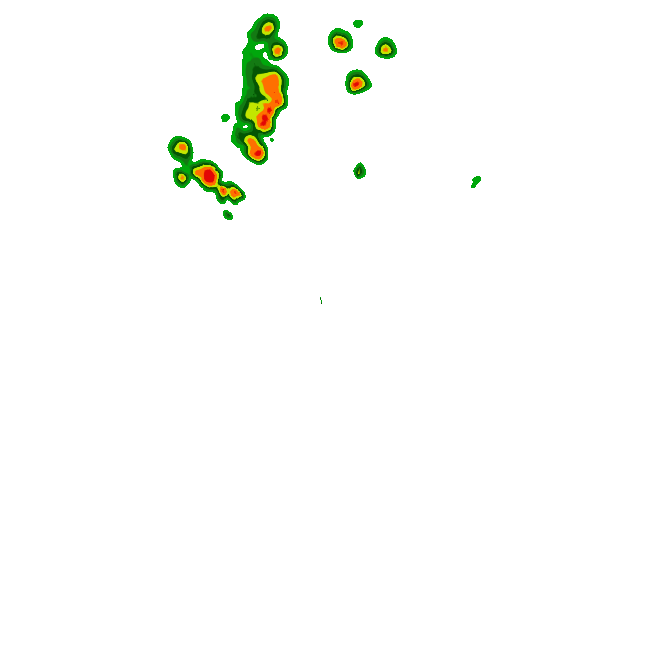

In [7]:
folium.raster_layers.ImageOverlay(
    image="../../data/radar_sumare/2019/04/08/2019_04_08_12_52.png",
    bounds=[[-21.513778948753702, -45.299029909370046], [-24.385778948753702, -41.162029909370046]],
    colormap=lambda x: (1, 0, 0, x),
    origin="lower",
    opacity=0.5,
).add_to(m)

m

## Overlay na imagem

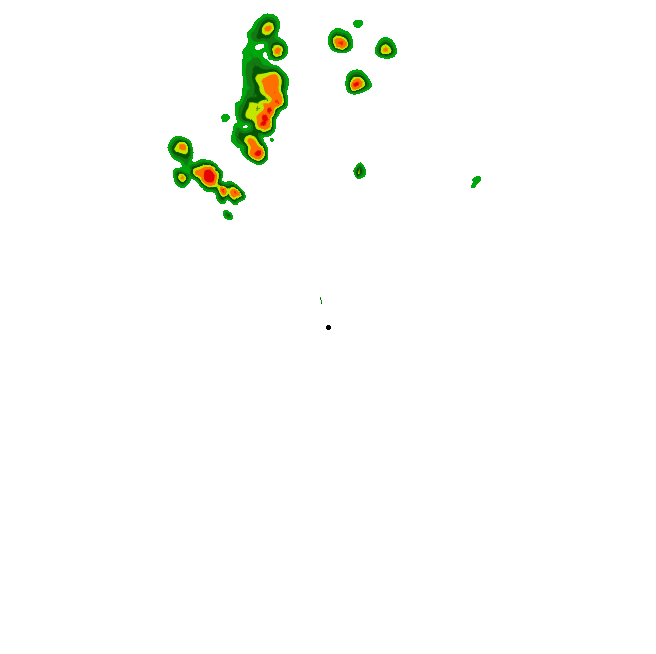

In [8]:
from PIL import Image, ImageDraw
import pandas as pd

# See https://g1.globo.com/rj/rio-de-janeiro/noticia/2019/04/09/bombeiros-registram-deslizamento-no-morro-da-babilonia-rio.ghtml
RADAR_FRAME_FOR_TESTING = Image.open("../../data/radar_sumare/2019/04/08/2019_04_08_12_52.png")

draw = ImageDraw.Draw(RADAR_FRAME_FOR_TESTING)
draw.circle((RADAR_FRAME_FOR_TESTING.width/2,RADAR_FRAME_FOR_TESTING.height/2),2,"black")
RADAR_FRAME_FOR_TESTING

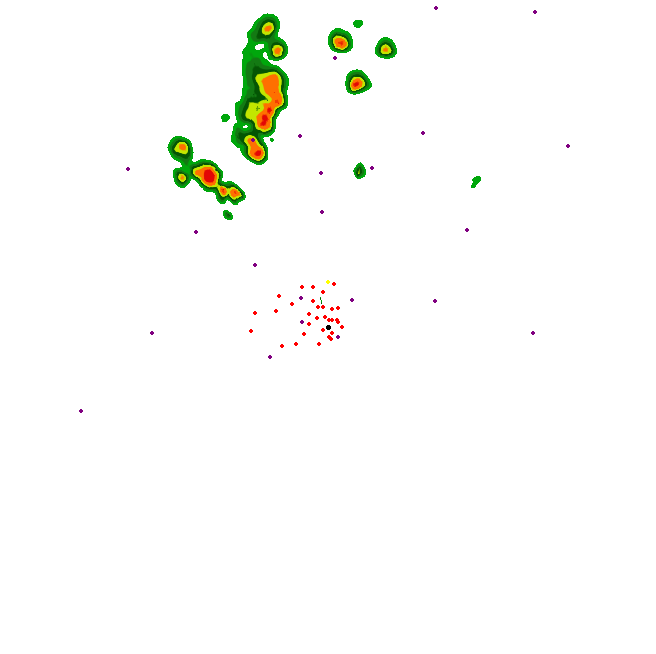

In [9]:
# pos_sumare = (-22.955139,-43.248278)
pos_sumare_img = (RADAR_FRAME_FOR_TESTING.height/2, RADAR_FRAME_FOR_TESTING.width/2)

dify = (pos_sumare_img[0]/SUMARE_RADAR_LAT)
difx = (pos_sumare_img[1]/SUMARE_RADAR_LON)


inmet_oeste = ['A636','A621','A602']
inmet_sul = ['A652']

# Desenha as estações do AlertaRio em vermelho
lat = list(df_AlertaRio_stations.VL_LATITUDE)
lon = list(df_AlertaRio_stations.VL_LONGITUDE)

for loc in zip(lat, lon):
    posx = SUMARE_RADAR_LON - ((loc[1] - SUMARE_RADAR_LON) * 22)
    valorx = posx * difx

    posy = SUMARE_RADAR_LAT + ((loc[0] - SUMARE_RADAR_LAT) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"red")


# Desenha as estações do INMET em roxo
lat = list(df_INMET_stations.VL_LATITUDE)
lon = list(df_INMET_stations.VL_LONGITUDE)

for loc in zip(lat, lon):
    posx = SUMARE_RADAR_LON - ((loc[1] - SUMARE_RADAR_LON) * 22)
    valorx = posx * difx

    posy = SUMARE_RADAR_LAT + ((loc[0] - SUMARE_RADAR_LAT) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"purple")

lat = [-22.81]
lon = [-43.25]

for loc in zip(lat, lon):
    posx = SUMARE_RADAR_LON - ((loc[1] - SUMARE_RADAR_LON) * 22)
    valorx = posx * difx

    posy = SUMARE_RADAR_LAT + ((loc[0] - SUMARE_RADAR_LAT) * 22)
    valory = posy * dify
    draw.circle((valorx,valory),1.5,"yellow")

RADAR_FRAME_FOR_TESTING

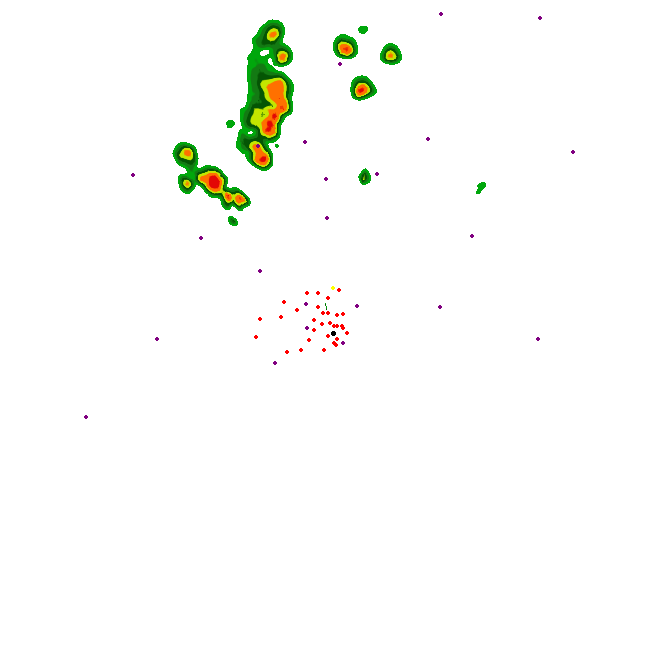

In [10]:
width, height = RADAR_FRAME_FOR_TESTING.size   # Get dimensions
new_width = new_height =666
left = (width - new_width)/2
top = (height - new_height)/2
right = (width + new_width)/2
bottom = (height + new_height)/2

# Crop the center of the image
tst2 = RADAR_FRAME_FOR_TESTING.crop((left, top, right, bottom))
tst2